# Laboratorio: Eliminación de anomalías de la imagen

## Integrantes

*   Carlos Daniel Pimentel Díaz
*   Cesar Humberto Clavijo Sánchez
*   Hector Enrique Abril Lancheros
*   Julio Moisés Sánchez Cabrera
*   Ricardo Hernández Martínez

## problema

Investigar y Aplicar técnicas de filtrado para eliminar el ruido speckle que corresponde a un patrón granular presente en imágenes obtenidas por escáneres de ultrasonido o radares de apertura sintética (SAR). Es considerado como un tipo de ruido multiplicativo a la señal. Este ruido es formado por la suma de eco de señales generadas aleatoriamente en los centros de difusión cada uno generando una cantidad aleatoria de energía
saludos

### Instalaciones previas:
Se debe realizar la instalación de la(s) siguiente(s) librería(s) ejecutando el comando que se encuentra en la siguiente celda. Una vez ejecutado se debe comentar.

In [1]:
import skimage
import skimage.io
from skimage import data, io, img_as_float
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
%matplotlib inline
from pylab import *
from skimage.metrics import structural_similarity as ssim

### Funciones usadas en el dasarrollo de la actividad.

In [2]:
def plotnoise(img, mode):
    '''Función que agrega ruido a una imagen.
       Devuelve la imagen con ruido.
    '''
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        return gimg
    else:
        return img

def rmse(imageA, imageB):
    '''Función que calcula la Raíz del Error Cuadrático Medio.
    '''
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err2 = math.sqrt(err)
    return err2

## Desarrollo de la actividad

### Cargamos imagen con la que se trabajará.

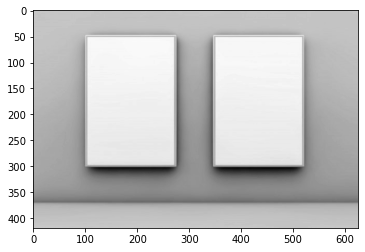

In [3]:
img = skimage.io.imread('Test.jpg')/255.0
grayscale = rgb2gray(img)
imshow(grayscale, cmap="gray")

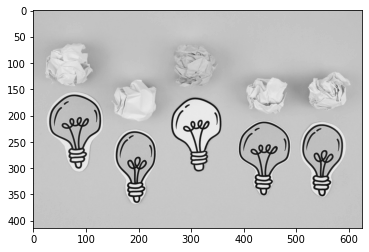

In [4]:
img2 = skimage.io.imread('Test2.jpg')/255.0
grayscale2 = rgb2gray(img2)
imshow(grayscale2, cmap="gray")

### Agregamos ruido Speckle a la imagen.

In [5]:
imglist = []
imglist.append(grayscale) 
speckle = plotnoise(grayscale, "speckle")
imglist.append(speckle)
imglist.append(grayscale2) 
speckle2 = plotnoise(grayscale2, "speckle")
imglist.append(speckle2)

### Graficamos imagen original e imagen con ruido Speckle.

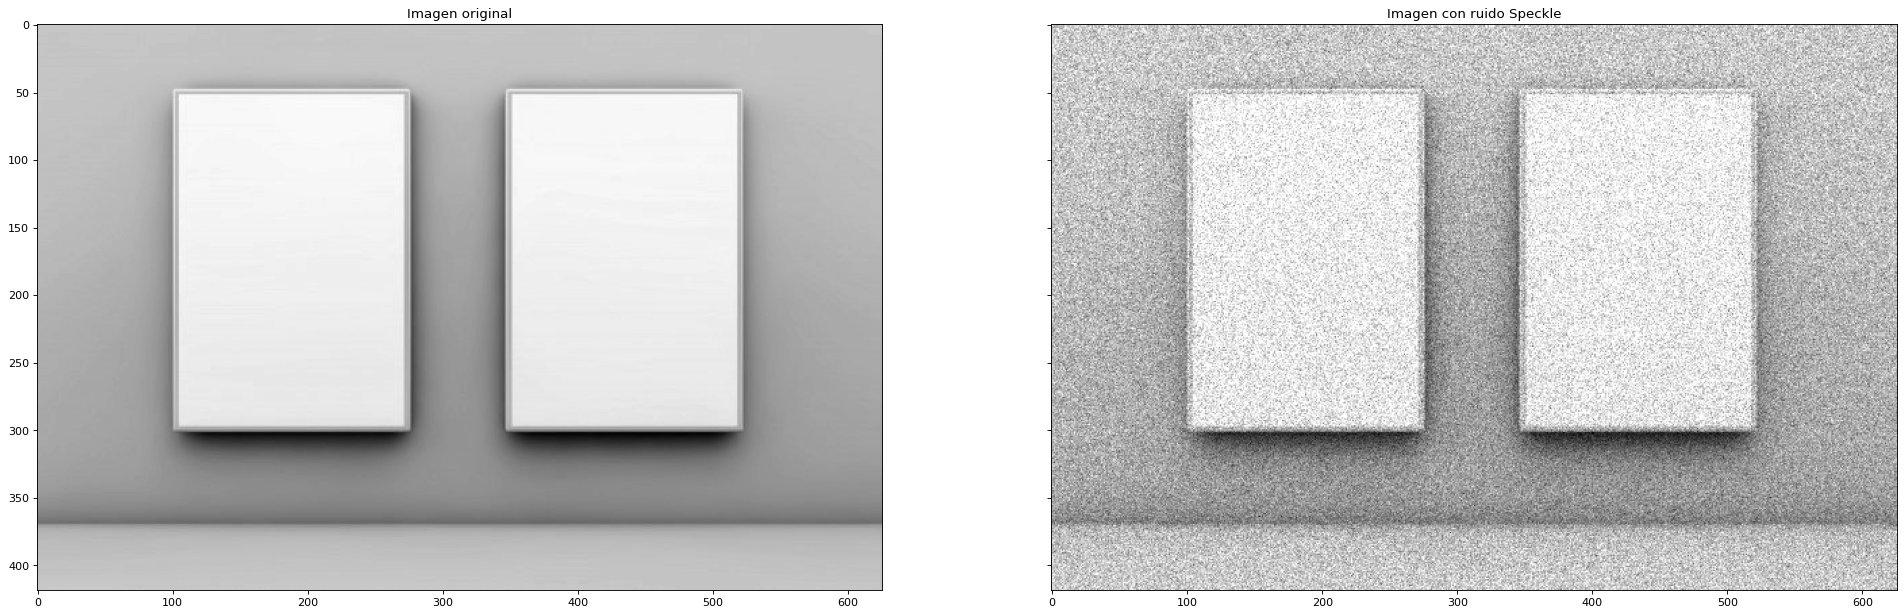

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 30), dpi=80, sharex=True, sharey=True)
ax[0].imshow(plotnoise(grayscale, None),  cmap="gray") 
ax[0].set_title('Imagen original')
ax[1].imshow(speckle,  cmap="gray") 
ax[1].set_title('Imagen con ruido Speckle')
show()

Se muestra el histograma antes y después del ruido

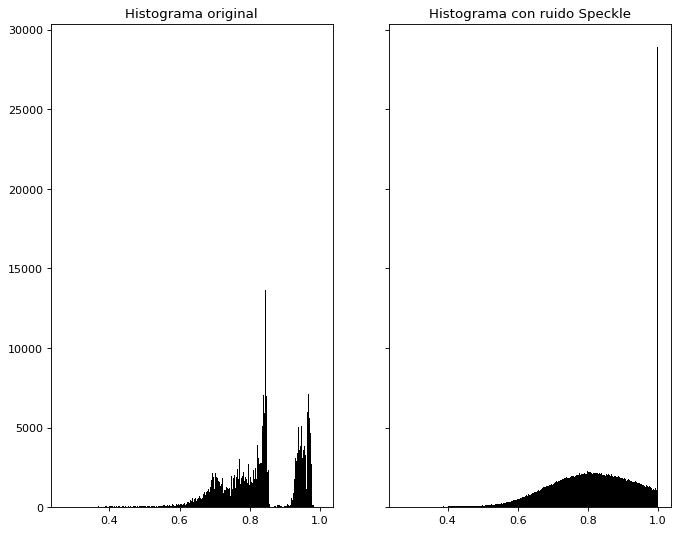

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma original')
ax[1].hist(imglist[1].ravel(),bins=256, color='black')
ax[1].set_title('Histograma con ruido Speckle')
show()

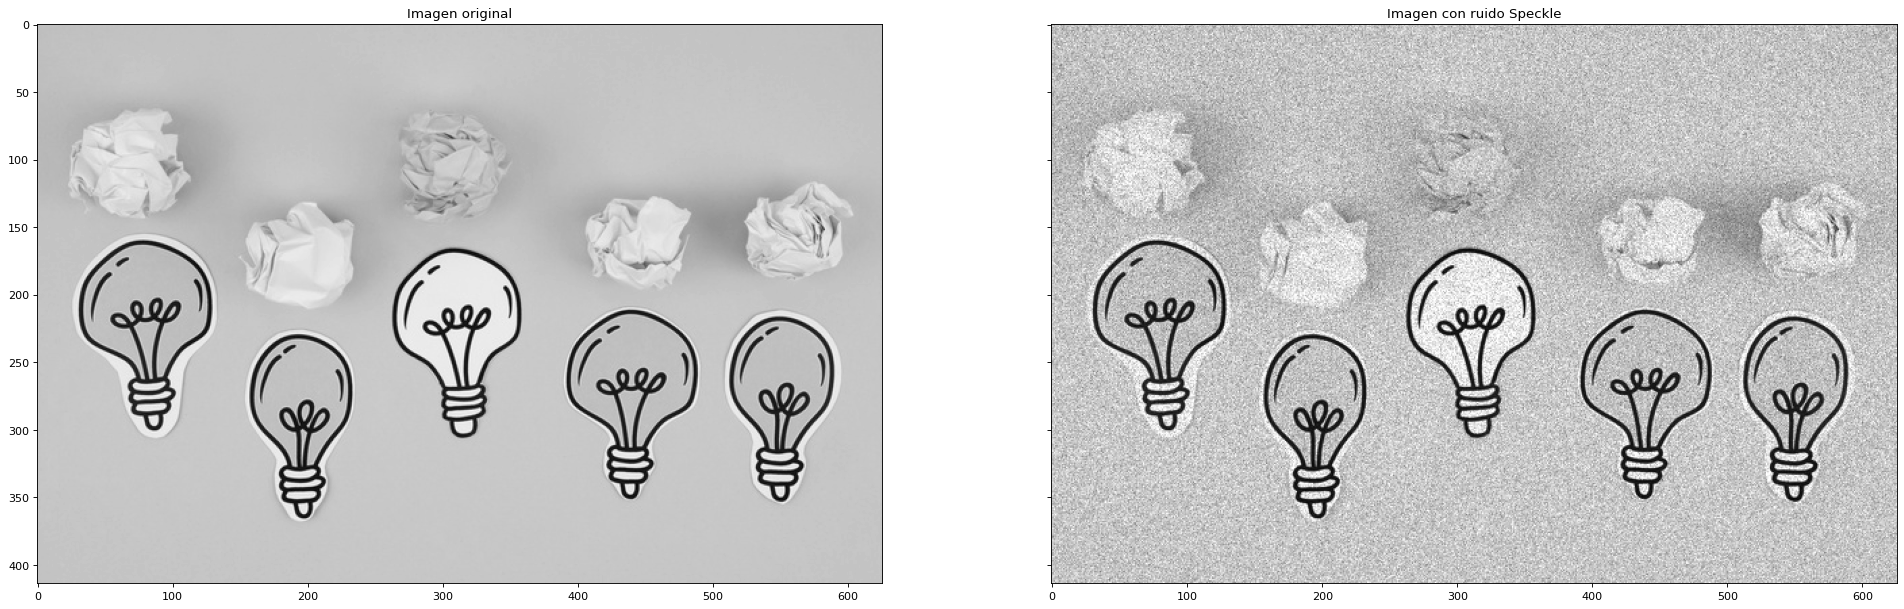

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 30), dpi=80, sharex=True, sharey=True)
ax[0].imshow(plotnoise(grayscale2, None),  cmap="gray") 
ax[0].set_title('Imagen original')
ax[1].imshow(speckle2,  cmap="gray") 
ax[1].set_title('Imagen con ruido Speckle')
show()

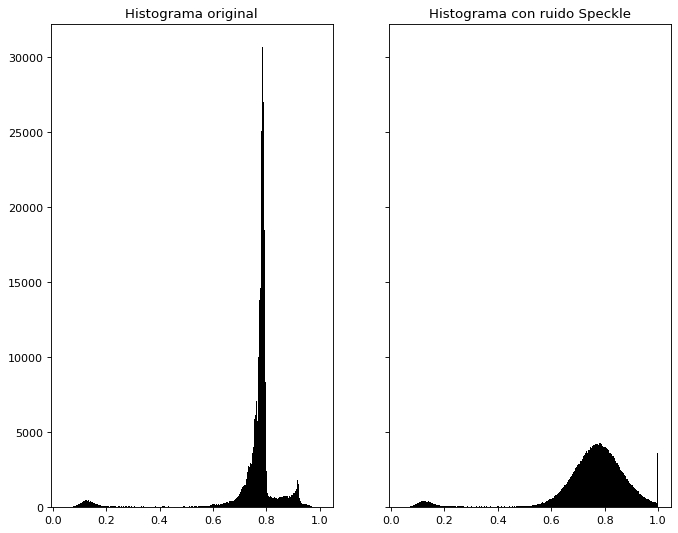

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[2].ravel(),bins=256, color='black')
ax[0].set_title('Histograma original')
ax[1].hist(imglist[3].ravel(),bins=256, color='black')
ax[1].set_title('Histograma con ruido Speckle')
show()

Comparamos el Índice de similitud estructural (SSIM)

In [10]:
float_img = img_as_float(grayscale)
float_noise_img = img_as_float(speckle)
float_img2 = img_as_float(grayscale2)
float_noise_img2 = img_as_float(speckle2)

ssim_original = ssim(float_img, float_img, data_range=float_img.max() - float_img.min())
ssim_noise = ssim(float_img, float_noise_img, data_range=float_noise_img.max() - float_noise_img.min())
ssim_original2 = ssim(float_img2, float_img2, data_range=float_img2.max() - float_img2.min())
ssim_noise2 = ssim(float_img2, float_noise_img2, data_range=float_noise_img2.max() - float_noise_img2.min())


Total = {'Imagen':["Test1", "Test2"],
        'SSIM original':[0,0],
        'SSIM Speckle':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_original # SSIM imagen original.
df.iloc[0,2] = ssim_noise # SIIM imagen con ruido Speckle.
df.iloc[1,1] = ssim_original2 # SSIM imagen original.
df.iloc[1,2] = ssim_noise2 # SIIM imagen con ruido Speckle.

df

,Imagen,SSIM original,SSIM Speckle
0,Test1,1.0,0.144171
1,Test2,1.0,0.280617


A continuación pasamos la imagen con ruido por los diferentes filtros.

# Filtro Lee

In [11]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

Se crea la función que define el filtro Lee.

In [12]:
def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

Aplicamos el filtro Lee a la imagen con ruido.

In [13]:
specklelee = lee_filter(imglist[1], 20)
imglist.append(specklelee)
specklelee2 = lee_filter(imglist[3], 20)
imglist.append(specklelee2)

Se grafica la imagen despues de aplicar el filtro Lee

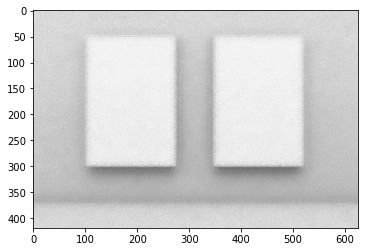

In [14]:
speckle = plotnoise(grayscale,"speckle")
imshow(imglist[4], vmin=0, vmax=1, cmap='gray')

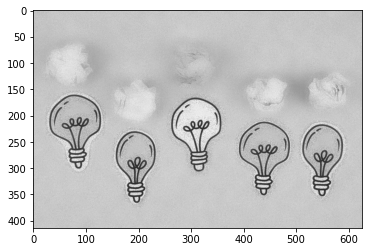

In [15]:
speckle2 = plotnoise(grayscale2,"speckle")
imshow(imglist[5], vmin=0, vmax=1, cmap='gray')

Comparamos el Índice de similitud estructural (SSIM)

In [16]:
float_lee_img = img_as_float(specklelee)
float_lee_img2 = img_as_float(specklelee2)

ssim_filter_lee = ssim(float_img, float_lee_img, data_range=float_lee_img.max() - float_lee_img.min())
ssim_filter_lee2 = ssim(float_img2, float_lee_img2, data_range=float_lee_img2.max() - float_lee_img2.min())

Total = {'Imagen':["Test1", "Test2"],
        'SSIM speckcle':[0,0],
        'SSIM Lee':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_noise # SSIM con ruido Speckle.
df.iloc[0,2] = ssim_filter_lee # SIIM imagen 
df.iloc[1,1] = ssim_noise2 # SSIM con ruido Speckle.
df.iloc[1,2] = ssim_filter_lee2 # SIIM imagen 

df

,Imagen,SSIM speckcle,SSIM Lee
0,Test1,0.144171,0.488643
1,Test2,0.280617,0.685912


Calculamos el RMSE para la imagen con ruido y con el filtro aplicado, se identifica que el error disminuye despues del filtro

In [17]:
Total = {'Imagen':["Test1", "Test2"], 
        'RMSE imagen ruido':[0,0],
        'RMSE Lee filter':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen con ruido.
df.iloc[0,2] = rmse(imglist[0], imglist[4]) # RMSE imagen filtrada con filtro Lee.
df.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen con ruido.
df.iloc[1,2] = rmse(imglist[2], imglist[5]) # RMSE imagen filtrada con filtro Lee.

df

,Imagen,RMSE imagen ruido,RMSE Lee filter
0,Test1,0.075308,0.029755
1,Test2,0.075318,0.039809


Esto también se puede apreciar en el histograma de la imagen despues de aplicar el filtro

Text(0.5, 1.0, ' Histograma Después de filtro Lee')

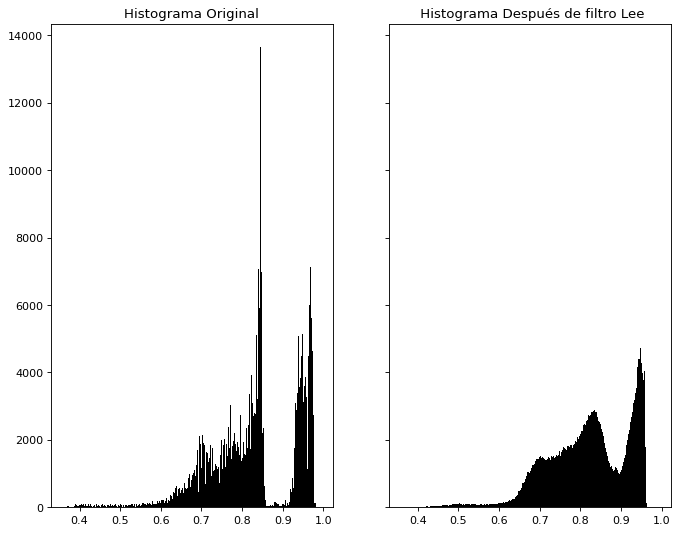

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[4].ravel(),bins=256, color='black')
ax[1].set_title(' Histograma Después de filtro Lee')

Text(0.5, 1.0, ' Histograma Después de filtro Lee')

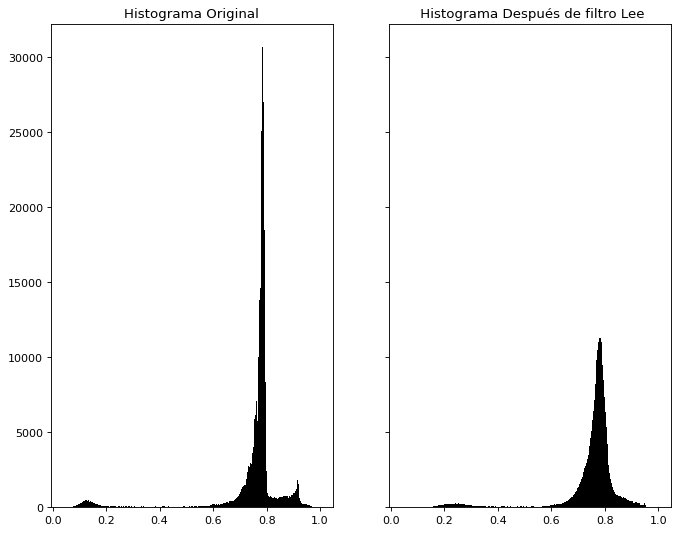

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[2].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[5].ravel(),bins=256, color='black')
ax[1].set_title(' Histograma Después de filtro Lee')

# Filtro Gaussiano

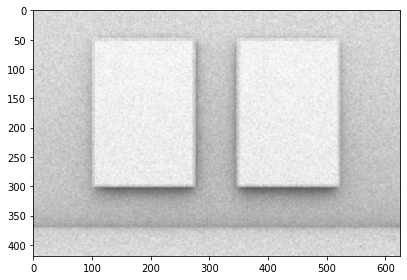

In [20]:
from skimage.filters import gaussian

speckle_gauss = gaussian(speckle)
imglist.append(speckle_gauss)
io.imshow(speckle_gauss)
plt.show() # Se grafica la imagen después de filtrar.

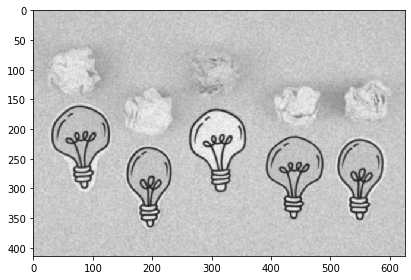

In [21]:
speckle_gauss2 = gaussian(speckle2)
imglist.append(speckle_gauss2)
io.imshow(speckle_gauss2)
plt.show() # Se grafica la imagen después de filtrar.

Comparamos el Índice de similitud estructural (SSIM)

In [22]:
float_lee_img = img_as_float(speckle_gauss)
float_lee_img2 = img_as_float(speckle_gauss2)

ssim_filter_gauss = ssim(float_img, float_lee_img, data_range=float_lee_img.max() - float_lee_img.min())
ssim_filter_gauss2 = ssim(float_img2, float_lee_img2, data_range=float_lee_img2.max() - float_lee_img2.min())

Total = {'Imagen':["Test1", "Test2"],
        'SSIM speckcle':[0,0],
        'SSIM Lee':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_noise # SSIM con ruido Speckle.
df.iloc[0,2] = ssim_filter_gauss # SIIM imagen 
df.iloc[1,1] = ssim_noise2 # SSIM con ruido Speckle.
df.iloc[1,2] = ssim_filter_gauss2 # SIIM imagen 

df

,Imagen,SSIM speckcle,SSIM Lee
0,Test1,0.144171,0.563038
1,Test2,0.280617,0.678836


Calculamos el RMSE de la imagen filtrada con filtro Gaussiano.

In [23]:
Tabla_Gauss = {'Imagen':["Test1", "Test2"], 
        'RMSE imagen ruido':[0,0],
        'RMSE Gaussian filter':[0,0]} 
  
df_Gauss = pd.DataFrame(Tabla_Gauss)

df_Gauss.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen con ruido.
df_Gauss.iloc[0,2] = rmse(imglist[0], imglist[6]) # RMSE imagen filtrada con filtro Gauss.
df_Gauss.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen con ruido.
df_Gauss.iloc[1,2] = rmse(imglist[2], imglist[7]) # RMSE imagen filtrada con filtro Gauss.

df_Gauss

,Imagen,RMSE imagen ruido,RMSE Gaussian filter
0,Test1,0.075308,0.025331
1,Test2,0.075318,0.047583


Ploteamos histograma de imagen original e imagen filtrada con filtro Gaussiano

Text(0.5, 1.0, 'Histograma después de filtro Gaussiano')

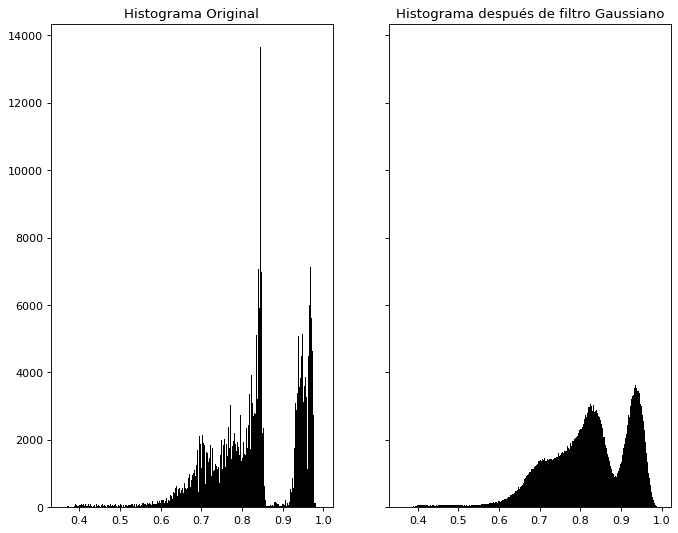

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[6].ravel(),bins=256, color='black')
ax[1].set_title('Histograma después de filtro Gaussiano')

Text(0.5, 1.0, 'Histograma después de filtro Gaussiano')

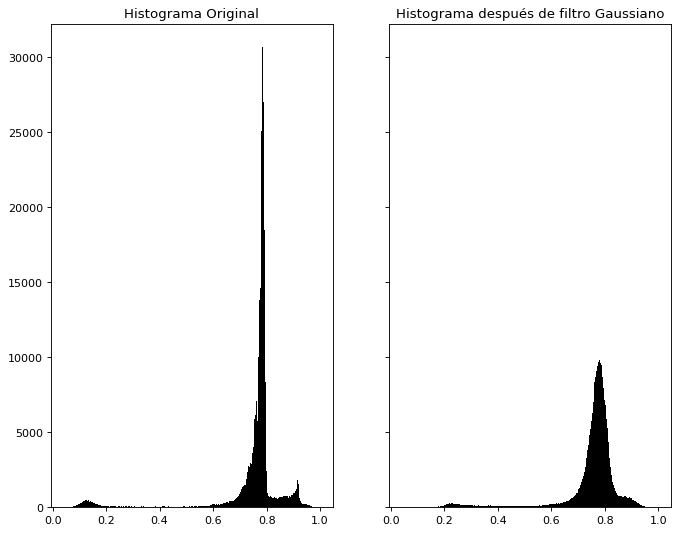

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[2].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[7].ravel(),bins=256, color='black')
ax[1].set_title('Histograma después de filtro Gaussiano')

# Filtro Frost

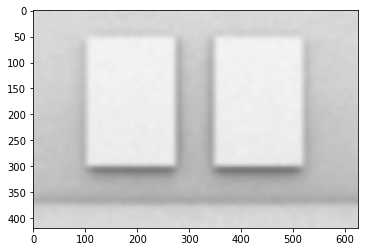

In [26]:
import findpeaks

speckle_frost = findpeaks.frost_filter(imglist[1], damping_factor=2, win_size=15)
imglist.append(speckle_frost)

imshow(speckle_frost, vmin=0, vmax=1, cmap='gray') # Se grafica la imagen después de filtrar.

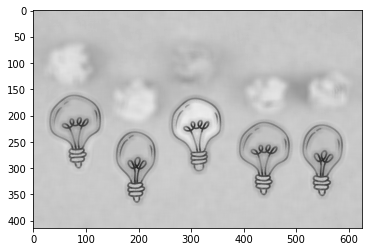

In [27]:
speckle_frost2 = findpeaks.frost_filter(imglist[3], damping_factor=2, win_size=15)
imglist.append(speckle_frost2)

imshow(speckle_frost2, vmin=0, vmax=1, cmap='gray') # Se grafica la imagen después de filtrar.

Comparamos el Índice de similitud estructural (SSIM)

In [28]:
float_frost_img = img_as_float(speckle_frost)
float_frost_img2 = img_as_float(speckle_frost2)


ssim_filter_frost = ssim(float_img, float_frost_img, data_range=float_frost_img.max() - float_frost_img.min())
ssim_filter_frost2 = ssim(float_img2, float_frost_img2, data_range=float_frost_img2.max() - float_frost_img2.min())

Total = {'Imagen':["Test1", "Test2"],
        'SSIM speckcle':[0,0],
        'SSIM Frost':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_noise # SSIM con ruido Speckle.
df.iloc[0,2] = ssim_filter_frost # SIIM imagen 
df.iloc[1,1] = ssim_noise2 # SSIM con ruido Speckle.
df.iloc[1,2] = ssim_filter_frost2 # SIIM imagen 

df

,Imagen,SSIM speckcle,SSIM Frost
0,Test1,0.144171,0.877319
1,Test2,0.280617,0.825678


Calculamos el RMSE de la imagen filtrada con filtro Frost.

In [29]:
Tabla_Frost = {'Imagen':["Test1", "Test2"], 
        'RMSE imagen ruido':[0,0],
        'RMSE Gaussian filter':[0,0]} 
  
df_Frost = pd.DataFrame(Tabla_Gauss)

df_Frost.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen con ruido.
df_Frost.iloc[0,2] = rmse(imglist[0], imglist[8]) # RMSE imagen filtrada con filtro Frost.
df_Frost.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen con ruido.
df_Frost.iloc[1,2] = rmse(imglist[2], imglist[9]) # RMSE imagen filtrada con filtro Frost.

df_Frost

,Imagen,RMSE imagen ruido,RMSE Gaussian filter
0,Test1,0.075308,0.024318
1,Test2,0.075318,0.070762


Ploteamos histograma de imagen original e imagen filtrada con filtro Frost.

Text(0.5, 1.0, 'Histograma Después de filtro Frost')

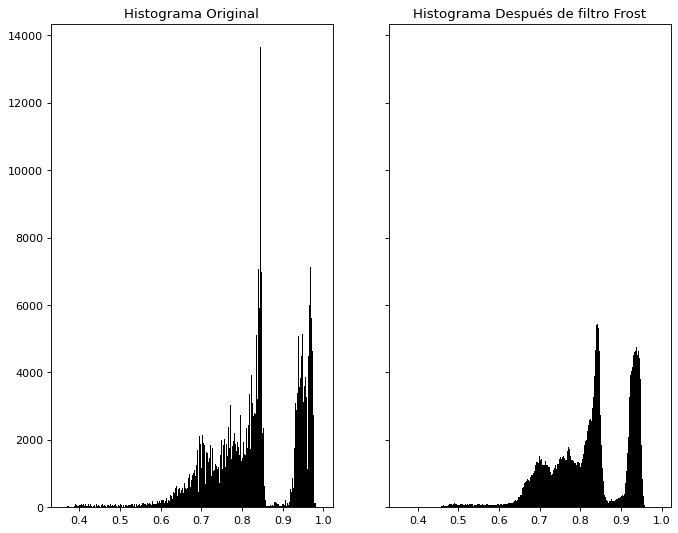

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[8].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Frost')

Text(0.5, 1.0, 'Histograma Después de filtro Frost')

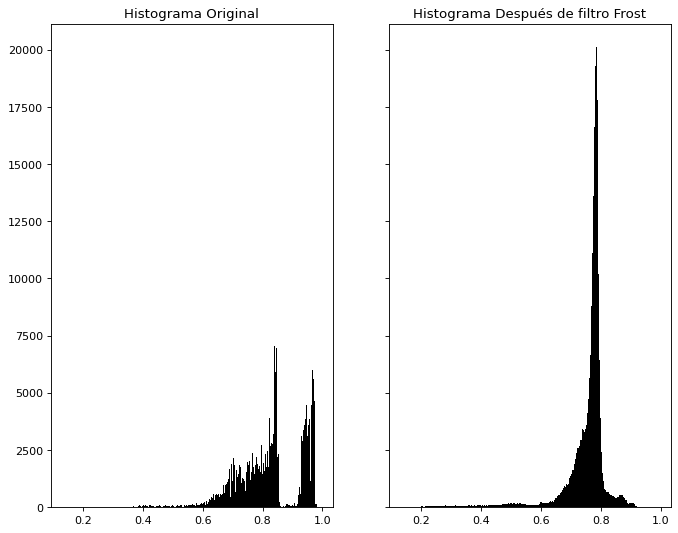

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[9].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Frost')

# Filtro Kuan

Se define la función para el filtro Kuan. Se creó adaptando la función de la librería Pyradar.

In [32]:
"""
Created on Tue Jan 11 2021

@author: Ricardo Hernández Martínez

Adaptado y traducido a partir de la librería PyRadar. Autores:
Matías Herranz <matiasherranz@gmail.com>
Joaquín Tita <joaquintita@gmail.com>
https://github.com/PyRadar/pyradar
GNU Lesser General Public
Copyright 2012 - 2013


Código fuente obtenido en las siguentes URLs:
https://github.com/PyRadar/pyradar/blob/master/pyradar/filters/kuan.py y 
https://github.com/PyRadar/pyradar/blob/ca06f23baf7132d06c889906d3544a71efd0e3a8/pyradar/filters/utils.py#L24

"""

import numpy as np
import math
from scipy.stats import variation

COEF_VAR_DEFAULT = 0.01
CU_DEFAULT = 0.25

def assert_window_size(win_size):
    """
    Validación de tamaño de ventana inválido.
    El tamaño de ventana debe ser impar y mayor o igual que 3.
    """
    assert win_size >= 3, 'ERROR: tamaño debe ser al menos 3'

    if win_size % 2 == 0:
        print('Se deben especificar tamaños de ventana impares.'\
              'Se especificó %s, un número par.' % (win_size, ))
            
def assert_indices_in_range(width, height, xleft, xright, yup, ydown):
    """
    Validación de índices en el rango de la imagen.
    """
    assert xleft >= 0 and xleft <= width, \
        "Index xleft:%s fuera de rango (%s<= xleft < %s)" % (xleft, 0, width)

    assert xright >= 0 and xright <= width, \
        "Index xright:%s fuera de rango (%s<= xright < %s)" % (xright, 0, width)

    assert yup >= 0 and yup <= height, \
        "Index yup:%s fuera de rango. (%s<= yup < %s)" % (yup, 0, height)

    assert ydown >= 0 and ydown <= height, \
        "Index ydown:%s fuera de rango. (%s<= ydown < %s)" % (ydown, 0, height)
              
def weighting(window, cu=CU_DEFAULT):
    """
    Calcula la función ponderada del filtro Kuan usando cu como coeficiente de variación
    de ruido.
    """
    # Cu al cuadraro
    two_cu = cu * cu

    # Función de scipy.stats que calcula relación entre la desviación estandar 
    # y media de un array. 'None' para calcular con todos los elementos del array
    ci = variation(window, None)
    # Ci al cuadrado
    two_ci = ci * ci

    # Para evitar división entre cero, se tomaría el COEF_VAR_DEFAULT para los cálculos
    if not two_ci:
        two_ci = COEF_VAR_DEFAULT

    # Divisor de la ecuación de ponderación
    divisor = 1.0 + two_cu

    # El valor de la función ponderada no puede ser negativo    
    if cu > ci:
        w_t = 0.0
    else:
        w_t = (1.0 - (two_cu / two_ci)) / divisor
    
    return w_t

def kuan_filter(img, win_size=3, cu=CU_DEFAULT):
    """
    Función obtenida adaptando la función de la librería pyradar, disponible para Python 2.
    Aplica el filtro Kuan a una matriz numpy que contiene la imagen, 
    con una ventana de tamaño win_size x win_size
    """

    # Validación del tamaño de la ventana deslizante
    assert_window_size(win_size)

    # Se procesa toda la matriz como float64 para evitar error de overflow
    img = np.float64(img)
    # Matriz que será retornada como resultado. Se inicializa con ceros
    img_filtered = np.zeros_like(img)

    # Dimensiones de la imagen a filtrar
    N, M = img.shape
    # Para obtener los límites de la ventana deslizante
    win_offset = win_size // 2

    # Todas las filas
    for i in range(0, N):
        xleft = i - win_offset
        xright = i + win_offset

        # Límites inferior y superior de la ventana deslizante a nivel de filas
        # Si sobrepasa los límites de la imagen, se recorta la ventana para que coincida con estos
        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N

        # Todas las columnas
        for j in range(0, M):
            yup = j - win_offset
            ydown = j + win_offset

            # Límites inferior y superior de la ventana deslizante a nivel de columnas
            # Si sobrepasa los límites de la imagen, se recorta la ventana para que coincida con estos
            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M

            # Validación de los límites de la ventana deslizante
            assert_indices_in_range(N, M, xleft, xright, yup, ydown)

            # Valor del pixel actual
            pix_value = img[i, j]
            # Se obtiene la ventana deslizante
            window = img[xleft:xright, yup:ydown]
            # Se calcula el valor ponderado en esas coordenadas
            w_t = weighting(window, cu)
            # Media de los valores de la ventana deslizante
            window_mean = window.mean()
            # Cálculo de píxel según fórmula del filtro Kuan
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))

            # Si es un número válido, se asigna a la imagen resultado.
            # De lo contrario, se deja el mismo valor de la imagen original
            if not math.isnan(new_pix_value):
                img_filtered[i, j] = new_pix_value
            else:
                img_filtered[i, j] = pix_value

    return img_filtered

Se toma una ventana de 13x13 y una variación de ruido de 1

In [33]:
speckle_Kuan = kuan_filter(imglist[1], 13, 1)
imglist.append(speckle_Kuan)
speckle_Kuan2 = kuan_filter(imglist[3], 13, 1)
imglist.append(speckle_Kuan2)

Se grafica la imagen después de aplicar el filtro Kuan.

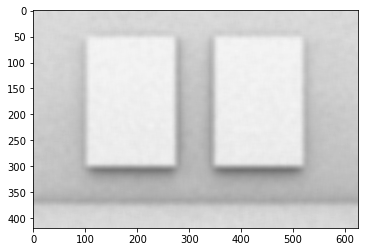

In [34]:
imshow(speckle_Kuan, vmin=0, vmax=1, cmap='gray')

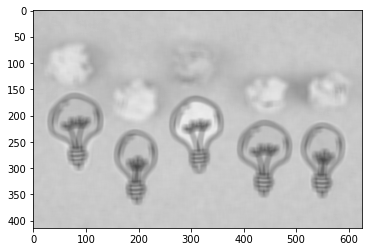

In [35]:
imshow(speckle_Kuan2, vmin=0, vmax=1, cmap='gray')

Comparamos el Índice de similitud estructural (SSIM)

In [36]:
float_kuan_img = img_as_float(speckle_Kuan)
float_kuan_img2 = img_as_float(speckle_Kuan2)

ssim_filter_kuan = ssim(float_img, float_kuan_img, data_range=float_kuan_img.max() - float_kuan_img.min())
ssim_filter_kuan2 = ssim(float_img2, float_kuan_img2, data_range=float_kuan_img2.max() - float_kuan_img2.min())

Total = {'Imagen':["Test1", "Test2"],
        'SSIM speckcle':[0,0],
        'SSIM Kuan':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_noise # SSIM con ruido Speckle.
df.iloc[0,2] = ssim_filter_kuan # SIIM imagen 
df.iloc[1,1] = ssim_noise2 # SSIM con ruido Speckle.
df.iloc[1,2] = ssim_filter_kuan2 # SIIM imagen 

df

,Imagen,SSIM speckcle,SSIM Kuan
0,Test1,0.144171,0.875640
1,Test2,0.280617,0.709163


Calculamos el RMSE de la imagen filtrada con filtro Kuan.

In [37]:
Tabla_Kuan = {'Imagen':["Test1", "Test2"], 
        'RMSE imagen ruido':[0,0],
        'RMSE Gaussian filter':[0,0]} 
  
df_Kuan = pd.DataFrame(Tabla_Gauss)

df_Kuan.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen con ruido.
df_Kuan.iloc[0,2] = rmse(imglist[0], imglist[10]) # RMSE imagen filtrada con filtro Kuan.
df_Kuan.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen con ruido.
df_Kuan.iloc[1,2] = rmse(imglist[2], imglist[11]) # RMSE imagen filtrada con filtro Kuan.

df_Kuan

,Imagen,RMSE imagen ruido,RMSE Gaussian filter
0,Test1,0.075308,0.023967
1,Test2,0.075318,0.108838


Se grafican los histogramas de la imagen original e imagen filtrada con filtro Kuan.

Text(0.5, 1.0, 'Histograma Después de filtro Kuan')

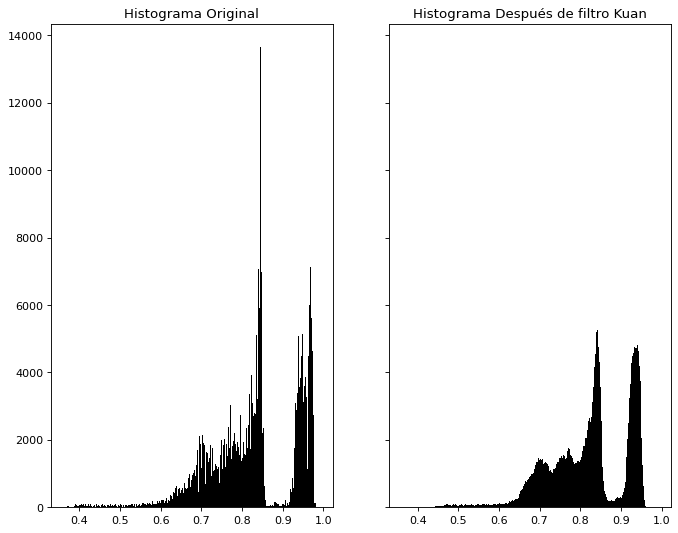

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[10].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Kuan')

Text(0.5, 1.0, 'Histograma Después de filtro Kuan')

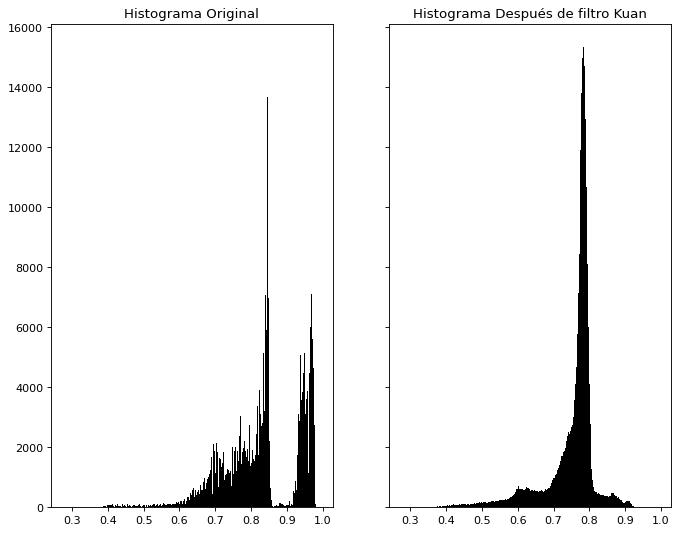

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[11].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Kuan')

# Filtro Median

Se aplica el filtro Median de la librería Skimage

In [40]:
from skimage.filters import median

speckle_Median = median(imglist[1])
imglist.append(speckle_Median)
speckle_Median2 = median(imglist[3])
imglist.append(speckle_Median2)

Se grafica la imagen después de aplicar el filtro Median.

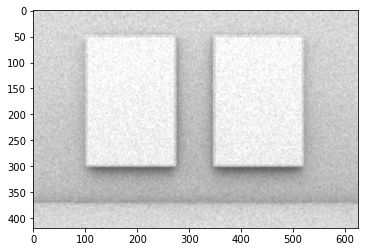

In [41]:
imshow(imglist[12], vmin=0, vmax=1, cmap='gray')

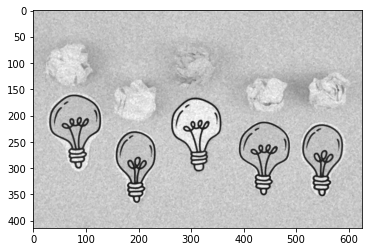

In [42]:
imshow(imglist[13], vmin=0, vmax=1, cmap='gray')

Comparamos el Índice de similitud estructural (SSIM)

In [43]:
float_median_img = img_as_float(speckle_Median)
float_median_img2 = img_as_float(speckle_Median2)

ssim_filter_median = ssim(float_img, float_median_img, data_range=float_median_img.max() - float_median_img.min())
ssim_filter_median2 = ssim(float_img2, float_median_img2, data_range=float_median_img2.max() - float_median_img2.min())


Total = {'Imagen':["Test1", "Test2"],
        'SSIM speckcle':[0,0],
        'SSIM Media':[0,0]} 
  
df = pd.DataFrame(Total)

df.iloc[0,1] = ssim_noise # SSIM con ruido Speckle.
df.iloc[0,2] = ssim_filter_median # SIIM imagen 
df.iloc[1,1] = ssim_noise2 # SSIM con ruido Speckle.
df.iloc[1,2] = ssim_filter_median2 # SIIM imagen 

df

,Imagen,SSIM speckcle,SSIM Media
0,Test1,0.144171,0.383295
1,Test2,0.280617,0.572166


Calculamos el RMSE de la imagen filtrada con filtro Median.

In [44]:
Tabla_Median  = {'Imagen':["Test1", "Test2"], 
        'RMSE imagen ruido':[0,0],
        'RMSE Gaussian filter':[0,0]} 
  
df_Median = pd.DataFrame(Tabla_Gauss)

df_Median.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen con ruido.
df_Median.iloc[0,2] = rmse(imglist[0], imglist[12]) # RMSE imagen filtrada con filtro Kuan.
df_Median.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen con ruido.
df_Median.iloc[1,2] = rmse(imglist[2], imglist[13]) # RMSE imagen filtrada con filtro Kuan.

df_Median

,Imagen,RMSE imagen ruido,RMSE Gaussian filter
0,Test1,0.075308,0.033344
1,Test2,0.075318,0.038280


Ploteamos histograma de imagen original e imagen filtrada con filtro Median.

Text(0.5, 1.0, 'Histograma Después de filtro Median')

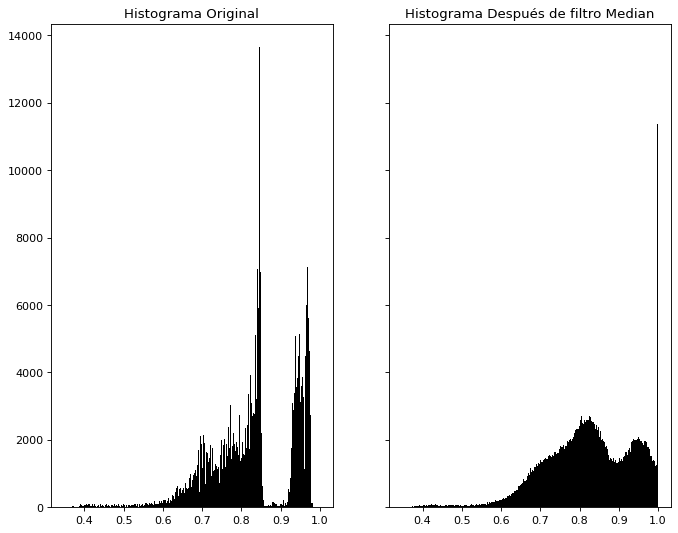

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[12].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Median')

Text(0.5, 1.0, 'Histograma Después de filtro Median')

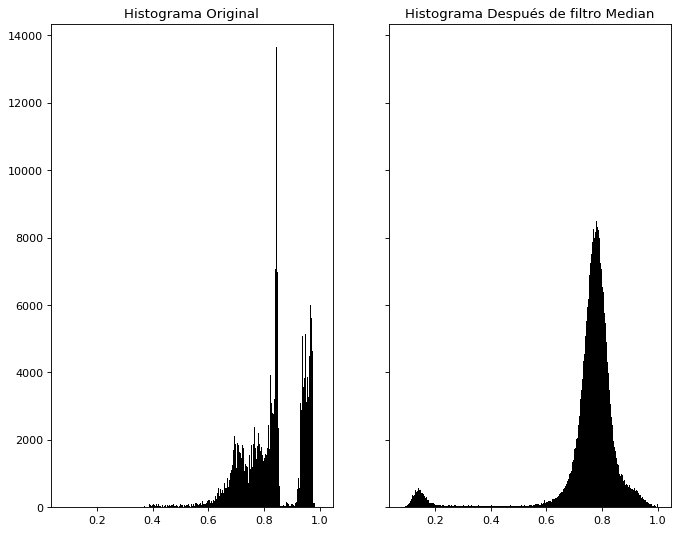

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=80, sharex=True, sharey=True)
ax[0].hist(imglist[0].ravel(),bins=256, color='black')
ax[0].set_title('Histograma Original')
ax[1].hist(imglist[13].ravel(),bins=256, color='black')
ax[1].set_title('Histograma Después de filtro Median')

### Tabla resumen

In [47]:
newDict = {'imagen':["Test1", "Test2"],
        'RMSE Original': [0,0],
        'RMSE Lee': [0,0],
        'RMSE Gaussian': [0,0],
        'RMSE Frost': [0,0],
        'RMSE Kuan': [0,0],
        'RMSE Median': [0,0]
        }

Dict = {'Filtro':["Lee", "Gaussiano", "Frost", "Kuan", "Median"],
        'RMSE original':[0, 0, 0, 0, 0],
        'RMSE after filter':[0, 0, 0, 0, 0]} 

newdf = pd.DataFrame(newDict)

newdf.iloc[0,1] = rmse(imglist[0], imglist[1]) # RMSE imagen original.
newdf.iloc[0,2] = rmse(imglist[0], imglist[4]) # RMSE imagen filtrada con filtro Lee.
newdf.iloc[0,3] = rmse(imglist[0], imglist[6]) # RMSE imagen filtrada con filtro Gaussiano.
newdf.iloc[0,4] = rmse(imglist[0], imglist[8]) # RMSE imagen filtrada con filtro Frost.
newdf.iloc[0,5] = rmse(imglist[0], imglist[10]) # RMSE imagen filtrada con filtro Kuan.
newdf.iloc[0,6] = rmse(imglist[0], imglist[12]) # RMSE imagen filtrada con filtro Median.
newdf.iloc[1,1] = rmse(imglist[2], imglist[3]) # RMSE imagen original.
newdf.iloc[1,2] = rmse(imglist[2], imglist[5]) # RMSE imagen filtrada con filtro Lee.
newdf.iloc[1,3] = rmse(imglist[2], imglist[7]) # RMSE imagen filtrada con filtro Gaussiano.
newdf.iloc[1,4] = rmse(imglist[2], imglist[9]) # RMSE imagen filtrada con filtro Frost.
newdf.iloc[1,5] = rmse(imglist[2], imglist[11]) # RMSE imagen filtrada con filtro Kuan.
newdf.iloc[1,6] = rmse(imglist[2], imglist[13]) # RMSE imagen filtrada con filtro Median.

newdf
newdf = newdf.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
newdf.set_properties(**{'text-align': 'center'}).hide_index()

imagen,RMSE Original,RMSE Lee,RMSE Gaussian,RMSE Frost,RMSE Kuan,RMSE Median
Test1,0.075308,0.029755,0.025331,0.024318,0.023967,0.033344
Test2,0.075318,0.039809,0.047583,0.070762,0.108838,0.038280


In [48]:
Total = {'imagen':["Test1", "Test2"],
        'SSIM Original': [1,1],
        'SSIM Speckle': [0,0],
        'SSIM Lee': [0,0],
        'SSIM Gaussian': [0,0],
        'SSIM Frost': [0,0],
        'SSIM Kuan': [0,0],
        'SSIM Median': [0,0]
        }

df = pd.DataFrame(Total)

df.iloc[0,2] = ssim_noise
df.iloc[0,3] = ssim_filter_lee
df.iloc[0,4] = ssim_filter_gauss
df.iloc[0,5] = ssim_filter_frost
df.iloc[0,6] = ssim_filter_kuan
df.iloc[0,7] = ssim_filter_median
df.iloc[1,2] = ssim_noise2
df.iloc[1,3] = ssim_filter_lee2
df.iloc[1,4] = ssim_filter_gauss2
df.iloc[1,5] = ssim_filter_frost2
df.iloc[1,6] = ssim_filter_kuan2
df.iloc[1,7] = ssim_filter_median2

df = df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df.set_properties(**{'text-align': 'center'}).hide_index()
df

imagen,SSIM Original,SSIM Speckle,SSIM Lee,SSIM Gaussian,SSIM Frost,SSIM Kuan,SSIM Median
Test1,1,0.144171,0.488643,0.563038,0.877319,0.875640,0.383295
Test2,1,0.280617,0.685912,0.678836,0.825678,0.709163,0.572166
